# 🧠 Deep Learning Practical Assignment (Adult Income Dataset)

## 📌 Dataset
We will use the **Adult Income dataset** (also known as the Census Income dataset).  
The task is to predict whether a person earns **more than $50K/year** based on demographic and employment attributes.

---


In [5]:
# Option 1: Using OpenML via scikit-learn
from sklearn.datasets import fetch_openml
import pandas as pd

# Load dataset from OpenML
adult = fetch_openml(name="adult", version=2, as_frame=True)
df = adult.frame

print(df.head())
print(df.shape)  # (48842, 15)

# Separate features and target
X = df.drop(columns="class")
y = df["class"]


   age  workclass  fnlwgt     education  education-num      marital-status  \
0   25    Private  226802          11th              7       Never-married   
1   38    Private   89814       HS-grad              9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm             12  Married-civ-spouse   
3   44    Private  160323  Some-college             10  Married-civ-spouse   
4   18        NaN  103497  Some-college             10       Never-married   

          occupation relationship   race     sex  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                NaN    Own-child  White  Female             0             0   

   hours-per-week native-country  class  
0       

In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


## Part 0: Data Preparation
1. Load the dataset into a DataFrame.
2. Split the data into **training, validation, and test sets**.  
   - Suggested: 70% training, 15% validation, 15% test.
3. Apply any necessary preprocessing:
   - Handle categorical features (encoding).
   - Scale numerical features if needed.
4. After training your models, always report results on:
   - **Training accuracy**
   - **Validation accuracy**
   - **Test accuracy**
5. At the end of the assignment, **compare all methods** across train, validation, and test sets.



## Part 1: Optimizers
1. Train the same neural network using:
   - Stochastic Gradient Descent (SGD)
   - SGD with Momentum
   - Adam
2. Compare the training and validation accuracy for each optimizer.
3. Which optimizer converges the fastest? Which gives the best generalization?
4. Explain *why* Adam often performs better than plain SGD.

---


## Part 2: Batch Size
1. Train the same model with different batch sizes (e.g., 1, 32, 128, 1024).
2. Compare:
   - Training speed
   - Validation accuracy
   - Test accuracy
   - Generalization ability
3. Which batch size leads to the **noisiest gradient updates**?
4. Which batch size generalizes better and why?


## Part 3: Overfitting and Regularization
1. Train a large neural network (many parameters) on the dataset.
2. Observe training vs. validation accuracy.  
   - Do you see signs of overfitting?
3. Apply regularization techniques:
   - **L2 regularization**
   - **Dropout**
4. Compare the validation results before and after regularization.
5. Which regularization method was more effective in reducing overfitting? Why?

---


## Part 4: Early Stopping
1. Train the model for many epochs without early stopping.  
   - Plot training, validation, and test curves.
2. Train again with **early stopping** (monitor validation loss).
3. Compare the number of epochs trained and the final validation/test accuracy.
4. Explain how early stopping helps prevent overfitting.

---

## Part 5: Reflection
1. Summarize what you learned about:
   - The role of optimizers
   - The effect of batch size
   - Regularization methods
   - Early stopping
   - Train/validation/test splits
2. If you had to train a deep learning model on a new tabular dataset, what choices would you make for:
   - Optimizer
   - Batch size
   - Regularization
   - Early stopping
   - Data splitting strategy  
   and why?

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
import joblib


import tensorflow as tf
from tensorflow.keras import layers, regularizers, callbacks, models
# Part 0 data preparation
# cleanup
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
# class sometimes has a trailing '.' in test set: ' >50K.'
df['class'] = df['class'].astype(str).str.replace('.', '', regex=False).str.strip()
df.reset_index(drop=True, inplace=True)

In [8]:
X = df.drop(columns="class")
y = df["class"]

# train (70%), temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

# split temp -> val (15%) + test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)

Train: (31655, 14) Val: (6783, 14) Test: (6784, 14)


In [9]:
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object", "category"]).columns.tolist()

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

# Fit on train
X_train_proc = preprocessor.fit_transform(X_train)
X_val_proc   = preprocessor.transform(X_val)
X_test_proc  = preprocessor.transform(X_test)

print("Processed shapes:", X_train_proc.shape, X_val_proc.shape, X_test_proc.shape)


Processed shapes: (31655, 104) (6783, 104) (6784, 104)


In [19]:
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping

# Build Model
model = models.Sequential([
    layers.Input(shape=(X_train_proc.shape[1],)),
    layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(1e-4)),
    layers.Dropout(0.3),
    layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(1e-4)),
    layers.Dropout(0.3),
    layers.Dense(1, activation="sigmoid")
])

# Compile Model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Early Stopping
early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

# Convert targets to binary (if not already)
y_train_bin = (y_train == '>50K').astype(int)
y_val_bin = (y_val == '>50K').astype(int)

# Train Model using preprocessed data
history = model.fit(
    X_train_proc, y_train_bin,
    epochs=50,
    batch_size=32,
    validation_data=(X_val_proc, y_val_bin),
    callbacks=[early_stop]
)


Epoch 1/50
990/990 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8397 - loss: 0.3622 - val_accuracy: 0.8442 - val_loss: 0.3372
Epoch 2/50
990/990 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8534 - loss: 0.3340 - val_accuracy: 0.8440 - val_loss: 0.3365
Epoch 3/50
990/990 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8531 - loss: 0.3294 - val_accuracy: 0.8470 - val_loss: 0.3310
Epoch 4/50
990/990 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8549 - loss: 0.3278 - val_accuracy: 0.8455 - val_loss: 0.3343
Epoch 5/50
990/990 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8569 - loss: 0.3234 - val_accuracy: 0.8456 - val_loss: 0.3322
Epoch 6/50
990/990 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8577 - loss: 0.3225 - val_accuracy: 0.8467 - val_loss: 0.3331
Epoch 7/50
990/990 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8575 - loss: 0.3214 - val_accuracy: 0.8458 - val_loss: 0.3309
Epoch 8/50
990/990 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8592 - loss: 0.3187 - val_accuracy: 0.

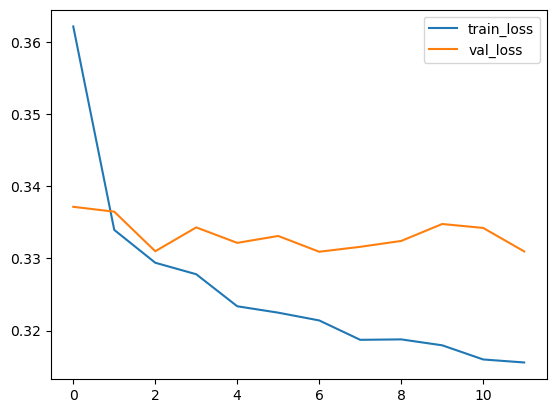

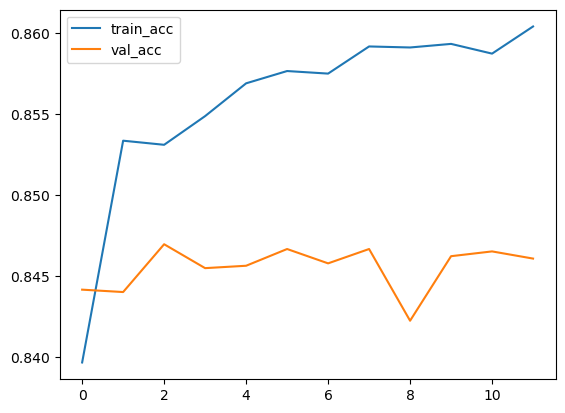

Test performance:
212/212 - 1s - 5ms/step - accuracy: 0.8494 - loss: 0.3262


[0.326192706823349, 0.8493514060974121]

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend(); plt.show()

plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.legend(); plt.show()

print("Test performance:")
y_test_bin = (y_test == '>50K').astype(int)
model.evaluate(X_test_proc, y_test_bin, verbose=2)
